In [1]:
import numpy as np
from numpy import concatenate 
import pandas as pd
from datetime import datetime  # 处理时间字符串的库
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
%matplotlib inline

In [2]:
# load data
# 返回时间格式
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = pd.read_csv('pollution.csv', index_col=0, parse_dates=[['year', 'month', 'day', 'hour']], date_parser = parse).drop('No',axis=1)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index_name = 'date'
dataset.head(26)   # 可见前24个pollution数据为Nan

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [3]:
# 删除 pollution 为nan的行
'''
inplace参数的理解：
         修改一个对象时：
               inplace=True：不创建新的对象，直接对原始对象进行修改；
               inplace=False：对数据进行修改，创建并返回新的对象承载其修改结果。
'''
dataset.drop(dataset[np.isnan(dataset['pollution'])].index, inplace=True) 
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
# 保存到 新的csv文件中 并查看
dataset.to_csv('pollution_1.csv')
dataset = pd.read_csv('pollution_1.csv',index_col=0)
dataset.index.name = 'date'
dataset.head()


,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


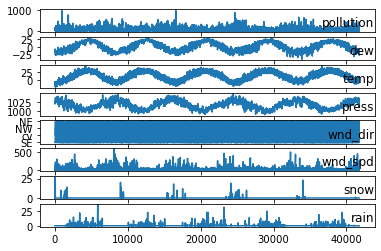

In [5]:
# 绘制图片
data = pd.read_csv('pollution_1.csv',index_col=0)
plt.figure()
for num in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, num+1)
    plt.plot(data.values[:,num])   # 选择所有行 第num列
    plt.title(data.columns[num], y=0, loc='right')

# 为LSTM准备数据

In [6]:
#定义一个函数 （ 感觉写的不好 ）
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1): 
        cols.append(df.shift(periods=i, axis=0))    # shift函数 默认是axis=0 即上下移动 periods=1表示向下移动
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]  # 注意对字符串的操作 
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(periods=-i)) # periods 表示向上移动一格
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1) # cols是列表 列表里面是一个个dataframe
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [7]:
#读取数据
data = pd.read_csv('pollution_1.csv',header=0,index_col=0)
data.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [8]:
# 第四列数据为风向数据 需要将其编码
values = data.values # 先取dataframe数据   values是numpy类型！
encoder =  LabelEncoder() 
values[:,4] = encoder.fit_transform(values[:,4])
values.astype('float32') # 数据类型转化为 float32
values[0:5,:]

array([[129.0, -16, -4.0, 1020.0, 2, 1.79, 0, 0],
       [148.0, -15, -4.0, 1020.0, 2, 2.68, 0, 0],
       [159.0, -11, -5.0, 1021.0, 2, 3.57, 0, 0],
       [181.0, -7, -5.0, 1022.0, 2, 5.36, 1, 0],
       [138.0, -7, -5.0, 1022.0, 2, 6.25, 2, 0]], dtype=object)

In [9]:
# 归一化
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled[0:5, :]

array([[0.12977867, 0.35294118, 0.24590164, 0.52727273, 0.66666667,
        0.00237151, 0.        , 0.        ],
       [0.14889336, 0.36764706, 0.24590164, 0.52727273, 0.66666667,
        0.00394662, 0.        , 0.        ],
       [0.15995976, 0.42647059, 0.2295082 , 0.54545455, 0.66666667,
        0.00552173, 0.        , 0.        ],
       [0.18209256, 0.48529412, 0.2295082 , 0.56363636, 0.66666667,
        0.00868965, 0.03703704, 0.        ],
       [0.138833  , 0.48529412, 0.2295082 , 0.56363636, 0.66666667,
        0.01026476, 0.07407407, 0.        ]])

In [10]:
# 将其转化为监督模型数据
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002372,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003947,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003947,0.000000,0.0,0.159960,0.426471,0.229508,0.545455,0.666667,0.005522,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545455,0.666667,0.005522,0.000000,0.0,0.182093,0.485294,0.229508,0.563636,0.666667,0.008690,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563636,0.666667,0.008690,0.037037,0.0,0.138833,0.485294,0.229508,0.563636,0.666667,0.010265,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563636,0.666667,0.010265,0.074074,0.0,0.109658,0.485294,0.213115,0.563636,0.666667,0.011840,0.111111,0.0


In [11]:
# 删掉后面没用的几列值
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]],axis=1,inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002372,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003947,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545455,0.666667,0.005522,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563636,0.666667,0.008690,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563636,0.666667,0.010265,0.074074,0.0,0.109658


# 定义LSTM模型

In [12]:
# 训练集和数据集分开
values = reframed.values  # values为numpy数据
n_train_hours =int( values.shape[0] * 0.7 ) #按照0.7：0.3的比例划分数据集
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [13]:
print(train.shape)
print(test.shape)

(29229, 9)
(12527, 9)


In [22]:
# 将输入输出分开
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]

In [23]:
train_x.shape,train_y.shape, test_x.shape, test_y.shape

((29229, 8), (29229,), (12527, 8), (12527,))

In [24]:
# 将输入数据转换为 3维数据 [samples, timesteps, features]   #这样每一个样本 为 1 * 8 
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [25]:
train_x.shape,train_y.shape, test_x.shape, test_y.shape

((29229, 1, 8), (29229,), (12527, 1, 8), (12527,))

In [18]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_x.shape[1],train_x.shape[2]), activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_x,train_y, epochs=50, batch_size=72,validation_data=(test_x, test_y), verbose=2, shuffle=False)


Train on 29229 samples, validate on 12527 samples
Epoch 1/50
29229/29229 - 4s - loss: 0.0442 - val_loss: 0.0618
Epoch 2/50
29229/29229 - 2s - loss: 0.0183 - val_loss: 0.0201
Epoch 3/50
29229/29229 - 2s - loss: 0.0145 - val_loss: 0.0152
Epoch 4/50
29229/29229 - 2s - loss: 0.0140 - val_loss: 0.0136
Epoch 5/50
29229/29229 - 2s - loss: 0.0138 - val_loss: 0.0129
Epoch 6/50
29229/29229 - 2s - loss: 0.0137 - val_loss: 0.0126
Epoch 7/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0125
Epoch 8/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0126
Epoch 9/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0125
Epoch 10/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0123
Epoch 11/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0125
Epoch 12/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0124
Epoch 13/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0126
Epoch 14/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0126
Epoch 15/50
29229/29229 - 2s - loss: 0.0136 - val_loss: 0.0124
Epoch 16/50
29

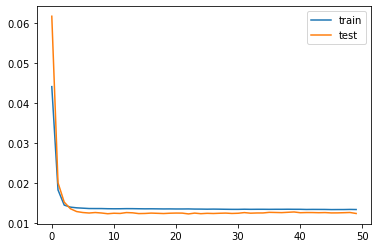

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 预测及评估模型

In [20]:

from sklearn.metrics import mean_squared_error
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_x[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.632


In [26]:
# 预测值转换为列表
y_hat = model.predict(test_x)
k_hat = y_hat.reshape(-1,).tolist()[0:100] # 预测值转列表
k = test_y.tolist()[0:100] # 真实值 转列表

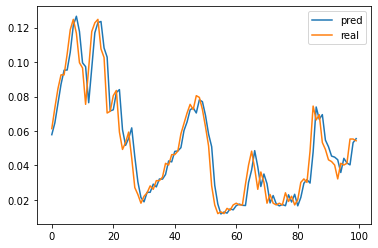

In [27]:
# 将预测值与真实值绘制出来
plt.plot(k_hat,label='pred')
plt.plot(k,label='real')
plt.legend()
plt.show()